In [214]:
#Escolha do Tema - Aplicação de Redes Neurais Artificiais - 08/09/2023 19:00 à 14/09/2023 23:00
#Coleta e Preparação dos Dados - Aplicação de Redes Neurais Artificiais - 15/09/2023 19:00 à 21/09/2023 23:00

In [215]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [216]:
#dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude

In [217]:
dataframe = pd.read_csv('DataSet\GlobalLandTemperaturesByCity.csv',index_col=False)

In [218]:
dataframe

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [219]:
#Encontra todas as linhas que possuem qualquer valor nulo e as exclue, essa ação foi tomada pois temos uma grande massa de dados#
linhas_nulas = dataframe.isnull().any(axis=1)
#Esta é a indexação condicional.
#Estamos usando a série booleana ~linhas_nulas como máscara booleana para indexar o DataFrame.
#Isso significa que apenas as linhas em que ~linhas_nulas é True (ou seja, as linhas que não contêm valores nulos)
dataframe = dataframe[~linhas_nulas]

In [220]:
city = dataframe['City'].values
country = dataframe['Country'].values
dt = dataframe['dt'].values

In [221]:
dataframe

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [222]:
encoder = preprocessing.OrdinalEncoder()
country_encoder = encoder.fit_transform(country.reshape(-1,1))
dataframe['Country_OrdinalEncoder'] = country_encoder

C:\Users\Renato Ribas\AppData\Local\Temp\ipykernel_25344\1429372312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Country_OrdinalEncoder'] = country_encoder


In [223]:
city_encoder = encoder.fit_transform(city.reshape(-1,1))
dataframe['City_OrdinalEncoder'] = city_encoder

C:\Users\Renato Ribas\AppData\Local\Temp\ipykernel_25344\4109312992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['City_OrdinalEncoder'] = city_encoder


In [224]:
dt_encoder = encoder.fit_transform(dt.reshape(-1,1))
dataframe['dt_OrdinalEncoder'] = dt_encoder

C:\Users\Renato Ribas\AppData\Local\Temp\ipykernel_25344\2782697065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['dt_OrdinalEncoder'] = dt_encoder


In [225]:
#Exclui as 
dataframe.drop(['dt','City','Country','AverageTemperatureUncertainty','Latitude','Longitude'], axis=1, inplace=True)

C:\Users\Renato Ribas\AppData\Local\Temp\ipykernel_25344\4007305628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(['dt','City','Country','AverageTemperatureUncertainty','Latitude','Longitude'], axis=1, inplace=True)


In [226]:
dataframe

,AverageTemperature,Country_OrdinalEncoder,City_OrdinalEncoder,dt_OrdinalEncoder
0,6.068,39.0,3443.0,0.0
5,5.788,39.0,3443.0,1.0
6,10.644,39.0,3443.0,2.0
7,14.051,39.0,3443.0,3.0
8,16.082,39.0,3443.0,4.0
...,...,...,...,...
8599206,7.710,100.0,3442.0,3161.0
8599207,11.464,100.0,3442.0,3162.0
8599208,15.043,100.0,3442.0,3163.0
8599209,18.775,100.0,3442.0,3164.0


In [227]:
    # Dividindo os dados para treino e teste
    x = dataframe.drop('AverageTemperature', axis=1)
    y = dataframe['AverageTemperature']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [228]:
# Criando a reed neural

model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear')) # saída linear

In [229]:
# Compilando modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [230]:
# Treinando a rede neural
history = model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=2,validation_data=(x_test, y_test))

Epoch 1/100
205878/205878 - 361s - loss: 116.9940 - mae: 8.2938 - val_loss: 100.1940 - val_mae: 8.0944 - 361s/epoch - 2ms/step
Epoch 2/100
205878/205878 - 211s - loss: 98.5200 - mae: 7.9480 - val_loss: 99.0822 - val_mae: 7.8756 - 211s/epoch - 1ms/step
Epoch 3/100
205878/205878 - 197s - loss: 97.6128 - mae: 7.9045 - val_loss: 96.9550 - val_mae: 7.8087 - 197s/epoch - 955us/step
Epoch 4/100


KeyboardInterrupt: 

NameError: name 'history' is not defined

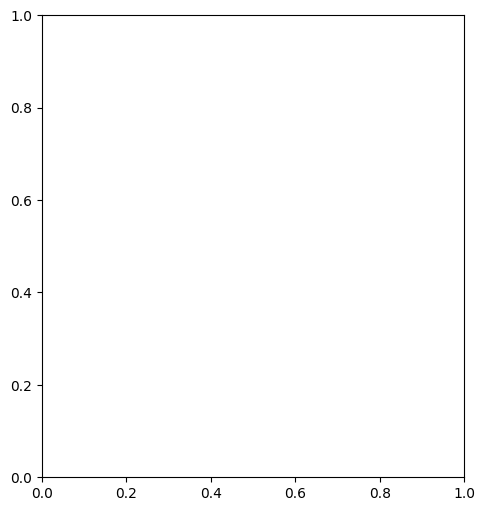

In [231]:
# Plotando o histórico de perda

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Histórico de loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Plotando o histórico de acurácia

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Histórico de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [235]:
git.init

NameError: name 'git' is not defined